In [44]:
import random
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter

In [45]:
def drawNumber():
    draw = random.random()
    return draw

In [46]:
df=pd.read_csv('testdata_credit_pool_v2.csv')
df[['Loan_Amount_1Y','Loan_Amount_2Y','Loan_Amount_3Y']] = (
    df[['Loan_Amount_1Y','Loan_Amount_2Y','Loan_Amount_3Y']]
    .replace(',', '', regex=True)
    .astype(float)
)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer_ID      100 non-null    int64  
 1   Loan_Amount_1Y   100 non-null    float64
 2   Loan_Amount_2Y   100 non-null    float64
 3   Loan_Amount_3Y   100 non-null    float64
 4   Rating           100 non-null    object 
 5   Default_Prob_1Y  100 non-null    float64
 6   Default_Prob_2Y  100 non-null    float64
 7   Default_Prob_3Y  100 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 6.4+ KB


In [48]:
#sns.pairplot(df)

In [49]:
df.corr(numeric_only=True)

,Customer_ID,Loan_Amount_1Y,Loan_Amount_2Y,Loan_Amount_3Y,Default_Prob_1Y,Default_Prob_2Y,Default_Prob_3Y
Customer_ID,1.000000,0.146989,0.146989,0.146987,-0.064851,-0.063600,-0.062640
Loan_Amount_1Y,0.146989,1.000000,1.000000,1.000000,0.133295,0.129398,0.127868
Loan_Amount_2Y,0.146989,1.000000,1.000000,1.000000,0.133294,0.129397,0.127867
Loan_Amount_3Y,0.146987,1.000000,1.000000,1.000000,0.133294,0.129397,0.127866
Default_Prob_1Y,-0.064851,0.133295,0.133294,0.133294,1.000000,0.997065,0.995646
Default_Prob_2Y,-0.063600,0.129398,0.129397,0.129397,0.997065,1.000000,0.999802
Default_Prob_3Y,-0.062640,0.127868,0.127867,0.127866,0.995646,0.999802,1.000000


In [50]:
rate = 0.08

##assume 33% payment each yr on orig loan amt
df['cf_yr1_npv']=np.round(df['Loan_Amount_1Y']*0.3333/(1+rate),2)
df['cf_yr2_npv']=np.round(df['Loan_Amount_1Y']*0.3333/((1+rate)**2),2)
df['cf_yr3_npv']=np.round(df['Loan_Amount_1Y']*0.3333/((1+rate)**3),2)

##npv loss
df['yr1_loss_adj']=np.round(df['Loan_Amount_1Y'],2)
df['yr2_loss_adj']=np.round(df['Loan_Amount_1Y']-df['cf_yr1_npv'],2)
df['yr3_loss_adj']=np.round(df['yr2_loss_adj']-df['cf_yr2_npv'],2)


In [51]:
df.head()

,Customer_ID,Loan_Amount_1Y,Loan_Amount_2Y,Loan_Amount_3Y,Rating,Default_Prob_1Y,Default_Prob_2Y,Default_Prob_3Y,cf_yr1_npv,cf_yr2_npv,cf_yr3_npv,yr1_loss_adj,yr2_loss_adj,yr3_loss_adj
0,1,100000.0,66670.0,33340.0,Aaa,0.000,0.000,0.00001,30861.11,28575.10,26458.43,100000.0,69138.89,40563.79
1,2,190000.0,126673.0,63346.0,Bb,0.028,0.055,0.07800,58636.11,54292.70,50271.01,190000.0,131363.89,77071.19
2,3,53000.0,35335.0,17670.0,Cc,0.170,0.230,0.30000,16356.39,15144.80,14022.97,53000.0,36643.61,21498.81
3,4,96000.0,64003.0,32006.0,Cc,0.170,0.230,0.30000,29626.67,27432.10,25400.09,96000.0,66373.33,38941.23
4,5,133000.0,88671.0,44342.0,Aaa,0.000,0.000,0.00001,41045.28,38004.89,35189.71,133000.0,91954.72,53949.83


In [52]:
defaults_1y = []
i = 0

while i < df.shape[0]:
    result = drawNumber()
    if df['Default_Prob_1Y'][i] < result:
        defaults_1y.append(0)
    else:
        defaults_1y.append(1)
    i = i+1

df['Defaults_1Y'] = defaults_1y

df

,Customer_ID,Loan_Amount_1Y,Loan_Amount_2Y,Loan_Amount_3Y,Rating,Default_Prob_1Y,Default_Prob_2Y,Default_Prob_3Y,cf_yr1_npv,cf_yr2_npv,cf_yr3_npv,yr1_loss_adj,yr2_loss_adj,yr3_loss_adj,Defaults_1Y
0,1,100000.0,66670.0,33340.0,Aaa,0.0000,0.0000,0.00001,30861.11,28575.10,26458.43,100000.0,69138.89,40563.79,0
1,2,190000.0,126673.0,63346.0,Bb,0.0280,0.0550,0.07800,58636.11,54292.70,50271.01,190000.0,131363.89,77071.19,0
2,3,53000.0,35335.0,17670.0,Cc,0.1700,0.2300,0.30000,16356.39,15144.80,14022.97,53000.0,36643.61,21498.81,0
3,4,96000.0,64003.0,32006.0,Cc,0.1700,0.2300,0.30000,29626.67,27432.10,25400.09,96000.0,66373.33,38941.23,0
4,5,133000.0,88671.0,44342.0,Aaa,0.0000,0.0000,0.00001,41045.28,38004.89,35189.71,133000.0,91954.72,53949.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,96000.0,64003.0,32006.0,Aaa,0.0000,0.0000,0.00001,29626.67,27432.10,25400.09,96000.0,66373.33,38941.23,0
96,97,124000.0,82671.0,41342.0,Bbb,0.0040,0.0100,0.01700,38267.78,35433.13,32808.45,124000.0,85732.22,50299.09,0
97,98,164000.0,109339.0,54678.0,A,0.0002,0.0008,0.00400,50612.22,46863.17,43391.82,164000.0,113387.78,66524.61,0
98,99,66000.0,44002.0,22004.0,Bb,0.0280,0.0550,0.07800,20368.33,18859.57,17462.56,66000.0,45631.67,26772.10,0


In [53]:
defaults_2y = []

i = 0
while i < df.shape[0]:
    if df['Defaults_1Y'][i] == 0:
        result = drawNumber()
        if df['Default_Prob_2Y'][i] < result:
            defaults_2y.append(0)
        else:
            defaults_2y.append(1)
    else:
        defaults_2y.append(1)
    i = i+1

df['Defaults_2Y'] = defaults_2y
df

,Customer_ID,Loan_Amount_1Y,Loan_Amount_2Y,Loan_Amount_3Y,Rating,Default_Prob_1Y,Default_Prob_2Y,Default_Prob_3Y,cf_yr1_npv,cf_yr2_npv,cf_yr3_npv,yr1_loss_adj,yr2_loss_adj,yr3_loss_adj,Defaults_1Y,Defaults_2Y
0,1,100000.0,66670.0,33340.0,Aaa,0.0000,0.0000,0.00001,30861.11,28575.10,26458.43,100000.0,69138.89,40563.79,0,0
1,2,190000.0,126673.0,63346.0,Bb,0.0280,0.0550,0.07800,58636.11,54292.70,50271.01,190000.0,131363.89,77071.19,0,0
2,3,53000.0,35335.0,17670.0,Cc,0.1700,0.2300,0.30000,16356.39,15144.80,14022.97,53000.0,36643.61,21498.81,0,1
3,4,96000.0,64003.0,32006.0,Cc,0.1700,0.2300,0.30000,29626.67,27432.10,25400.09,96000.0,66373.33,38941.23,0,0
4,5,133000.0,88671.0,44342.0,Aaa,0.0000,0.0000,0.00001,41045.28,38004.89,35189.71,133000.0,91954.72,53949.83,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,96000.0,64003.0,32006.0,Aaa,0.0000,0.0000,0.00001,29626.67,27432.10,25400.09,96000.0,66373.33,38941.23,0,0
96,97,124000.0,82671.0,41342.0,Bbb,0.0040,0.0100,0.01700,38267.78,35433.13,32808.45,124000.0,85732.22,50299.09,0,0
97,98,164000.0,109339.0,54678.0,A,0.0002,0.0008,0.00400,50612.22,46863.17,43391.82,164000.0,113387.78,66524.61,0,0
98,99,66000.0,44002.0,22004.0,Bb,0.0280,0.0550,0.07800,20368.33,18859.57,17462.56,66000.0,45631.67,26772.10,0,0


In [54]:
defaults_3y = []

i = 0
while i < df.shape[0]:
    if df['Defaults_2Y'][i] == 0:
        result = drawNumber()
        if df['Default_Prob_3Y'][i] < result:
            defaults_3y.append(0)
        else:
            defaults_3y.append(1)
    else:
        defaults_3y.append(1)
    i = i+1

df['Defaults_3Y'] = defaults_3y
df

,Customer_ID,Loan_Amount_1Y,Loan_Amount_2Y,Loan_Amount_3Y,Rating,Default_Prob_1Y,Default_Prob_2Y,Default_Prob_3Y,cf_yr1_npv,cf_yr2_npv,cf_yr3_npv,yr1_loss_adj,yr2_loss_adj,yr3_loss_adj,Defaults_1Y,Defaults_2Y,Defaults_3Y
0,1,100000.0,66670.0,33340.0,Aaa,0.0000,0.0000,0.00001,30861.11,28575.10,26458.43,100000.0,69138.89,40563.79,0,0,0
1,2,190000.0,126673.0,63346.0,Bb,0.0280,0.0550,0.07800,58636.11,54292.70,50271.01,190000.0,131363.89,77071.19,0,0,0
2,3,53000.0,35335.0,17670.0,Cc,0.1700,0.2300,0.30000,16356.39,15144.80,14022.97,53000.0,36643.61,21498.81,0,1,1
3,4,96000.0,64003.0,32006.0,Cc,0.1700,0.2300,0.30000,29626.67,27432.10,25400.09,96000.0,66373.33,38941.23,0,0,1
4,5,133000.0,88671.0,44342.0,Aaa,0.0000,0.0000,0.00001,41045.28,38004.89,35189.71,133000.0,91954.72,53949.83,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,96000.0,64003.0,32006.0,Aaa,0.0000,0.0000,0.00001,29626.67,27432.10,25400.09,96000.0,66373.33,38941.23,0,0,0
96,97,124000.0,82671.0,41342.0,Bbb,0.0040,0.0100,0.01700,38267.78,35433.13,32808.45,124000.0,85732.22,50299.09,0,0,0
97,98,164000.0,109339.0,54678.0,A,0.0002,0.0008,0.00400,50612.22,46863.17,43391.82,164000.0,113387.78,66524.61,0,0,0
98,99,66000.0,44002.0,22004.0,Bb,0.0280,0.0550,0.07800,20368.33,18859.57,17462.56,66000.0,45631.67,26772.10,0,0,0


In [55]:
df[['Defaults_1Y','Defaults_2Y','Defaults_3Y']].value_counts()

Defaults_1Y  Defaults_2Y  Defaults_3Y
0            0            0              81
1            1            1               7
0            0            1               6
             1            1               6
Name: count, dtype: int64

In [56]:
loss = 0
i = 0

while i < df.shape[0]:
    if df['Defaults_1Y'][i] == 1:
        loss = loss + df['Loan_Amount_1Y'][i]
    elif df['Defaults_2Y'][i] == 1:
        loss = loss + df['Loan_Amount_2Y'][i]
    elif df['Defaults_3Y'][i] == 1:
        loss = loss + df['Loan_Amount_3Y'][i]
    i = i+1

In [81]:
###sims
sim_num = 10000
s = 0

sim_losses = []
sim_losses_Aa = []
sim_losses_Bb = []
sim_losses_Cc = []

while s < sim_num:
    # Simulated Year 1 defaults
    defaults_1y = []

    i = 0
    while i < df.shape[0]:
        result = drawNumber()
        if df['Default_Prob_1Y'][i] < result:
            defaults_1y.append(0)
        else:
            defaults_1y.append(1)
        i = i+1

    df['Defaults_1Y'] = defaults_1y

    # Simulated Year 2 defaults
    defaults_2y = []

    i = 0
    while i < df.shape[0]:
        if df['Defaults_1Y'][i] == 0:
            result = drawNumber()
            if df['Default_Prob_2Y'][i] < result:
                defaults_2y.append(0)
            else:
                defaults_2y.append(1)
        else:
            defaults_2y.append(1)
        i = i+1

    df['Defaults_2Y'] = defaults_2y

    # Simulated Year 3 defaults
    defaults_3y = []

    i = 0
    while i < df.shape[0]:
        if df['Defaults_2Y'][i] == 0:
            result = drawNumber()
            if df['Default_Prob_3Y'][i] < result:
                defaults_3y.append(0)
            else:
                defaults_3y.append(1)
        else:
            defaults_3y.append(1)
        i = i+1

    df['Defaults_3Y'] = defaults_3y

    # Calculate losses
    loss = 0
    i = 0
    while i < df.shape[0]:
        if df['Defaults_1Y'][i] == 1:
            loss = loss + df['yr1_loss_adj'][i]
        elif df['Defaults_2Y'][i] == 1:
            loss = loss + df['yr2_loss_adj'][i]
        elif df['Defaults_3Y'][i] == 1:
            loss = loss + df['yr3_loss_adj'][i]
        i = i+1

    # Add loss to losses vector
    sim_losses.append(loss)

    # Calculate losses by rating
        # Calculate losses by rating
    loss_Aa = 0
    i = 0
    while i < df.shape[0]:
        if df['Defaults_1Y'][i] == 1 and df['Rating'][i]=='Aa':
            loss_Aa = loss_Aa + df['yr1_loss_adj'][i]
        elif df['Defaults_2Y'][i] == 1 and df['Rating'][i]=='Aa':
            loss_Aa = loss_Aa + df['yr2_loss_adj'][i]
        elif df['Defaults_3Y'][i] == 1 and df['Rating'][i]=='Aa':
            loss_Aa = loss_Aa + df['yr3_loss_adj'][i]
        i = i+1

    # Add loss to losses vector
    sim_losses_Aa.append(loss_Aa)
    
    loss_Bb = 0
    i = 0
    while i < df.shape[0]:
        if df['Defaults_1Y'][i] == 1 and df['Rating'][i]=='Bb':
            loss_Bb = loss_Bb + df['yr1_loss_adj'][i]
        elif df['Defaults_2Y'][i] == 1 and df['Rating'][i]=='Bb':
            loss_Bb = loss_Bb + df['yr2_loss_adj'][i]
        elif df['Defaults_3Y'][i] == 1 and df['Rating'][i]=='Bb':
            loss_Bb = loss_Bb + df['yr3_loss_adj'][i]
        i = i+1

    # Add loss to losses vector
    sim_losses_Bb.append(loss_Bb)

    loss_Cc = 0
    i = 0
    while i < df.shape[0]:
        if df['Defaults_1Y'][i] == 1 and df['Rating'][i]=='Cc':
            loss_Cc = loss_Cc + df['yr1_loss_adj'][i]
        elif df['Defaults_2Y'][i] == 1 and df['Rating'][i]=='Cc':
            loss_Cc = loss_Cc + df['yr2_loss_adj'][i]
        elif df['Defaults_3Y'][i] == 1 and df['Rating'][i]=='Cc':
            loss_Cc = loss_Cc + df['yr3_loss_adj'][i]
        i = i+1

    # Add loss to losses vector
    sim_losses_Cc.append(loss_Cc)

    # Add to iterator
    s = s+1


C:\Users\600330522\AppData\Local\Temp\ipykernel_21356\1109365931.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{v*100:.5f}%' for v in vals])


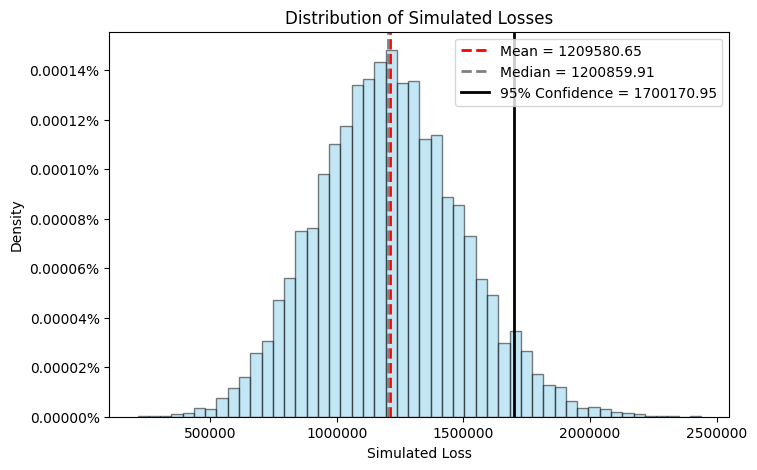

In [82]:
# Charting the losses
confidence_interval=95

fig, ax = plt.subplots(figsize=(8, 5))

# Histogram of simulated losses
ax.hist(sim_losses, bins=50, density=True, alpha=0.5, color='skyblue', edgecolor='k')

# Mean line
mean_loss = np.mean(sim_losses)
ax.axvline(mean_loss, color='red', linestyle='dashed', linewidth=2, label=f'Mean = {mean_loss:.2f}')
ax.axvline(np.median(sim_losses), color='gray', linestyle='dashed', linewidth=2, label=f'Median = {np.median(sim_losses):.2f}')
ax.axvline(np.percentile(sim_losses,confidence_interval), color='black',  linewidth=2, label=f'{confidence_interval}% Confidence = {np.percentile(sim_losses,confidence_interval):.2f}')


# Axis formatting

ax.ticklabel_format(useOffset=False, style='plain')
ax.set_xlabel('Simulated Loss')
ax.set_ylabel('Density')
ax.set_title('Distribution of Simulated Losses')
ax.legend()
vals = ax.get_yticks()
ax.set_yticklabels([f'{v*100:.5f}%' for v in vals])

plt.show()

###5% chance of losing more than 95th pctile

C:\Users\600330522\AppData\Local\Temp\ipykernel_21356\3874460102.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_yticklabels([f'{v*100:.5f}%' for v in vals1])
C:\Users\600330522\AppData\Local\Temp\ipykernel_21356\3874460102.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels([f'{v*100:.5f}%' for v in vals2])
C:\Users\600330522\AppData\Local\Temp\ipykernel_21356\3874460102.py:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_yticklabels([f'{v*100:.5f}%' for v in vals3])


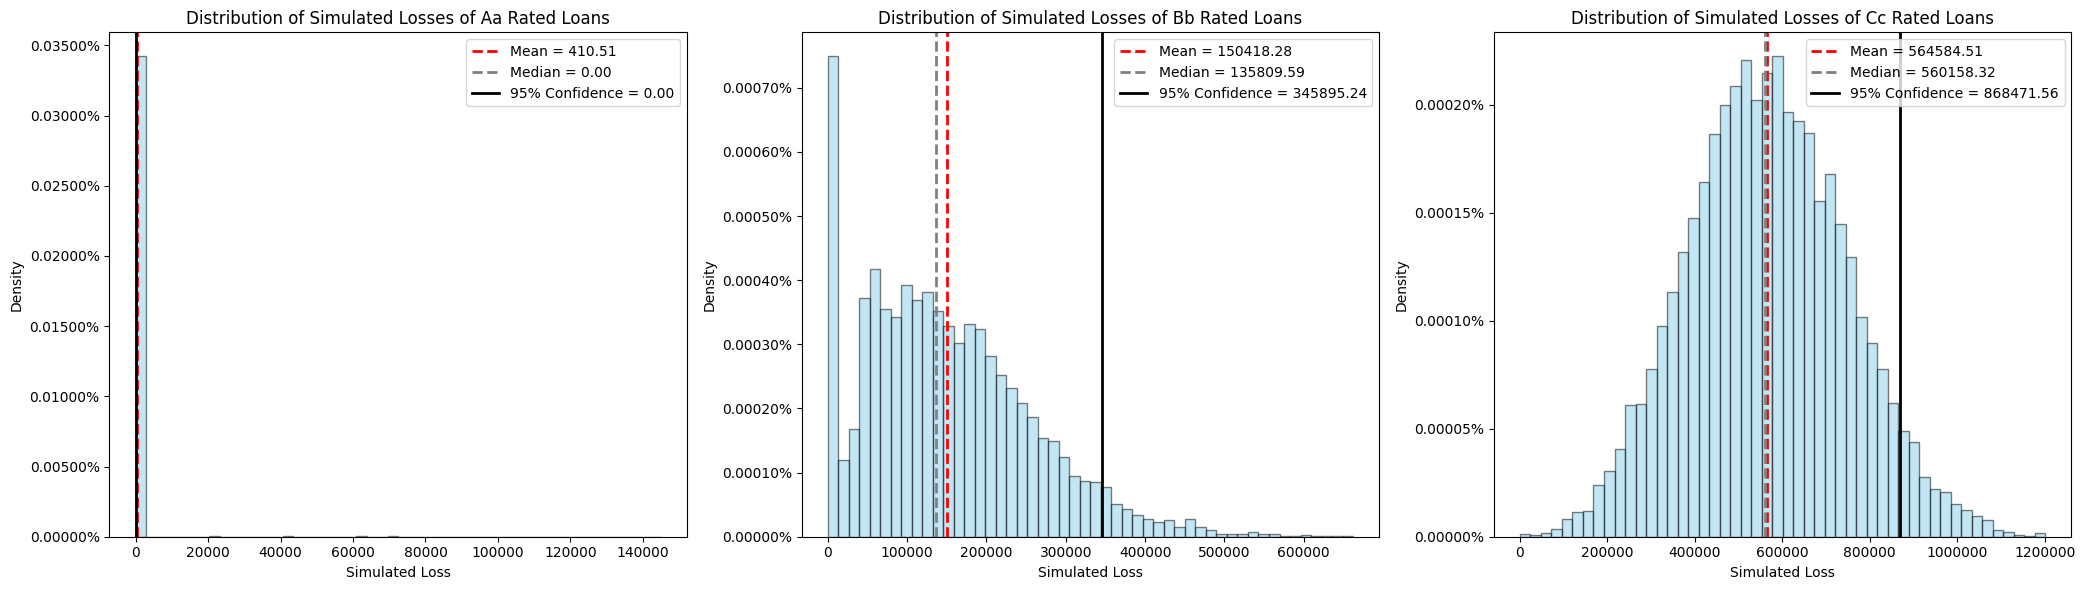

In [84]:
# Charting the losses
confidence_interval=95

fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(21, 6))

# Histogram of simulated losses
ax1.hist(sim_losses_Aa, bins=50, density=True, alpha=0.5, color='skyblue', edgecolor='k')

# Mean line
mean_loss_Aa = np.mean(sim_losses_Aa)
ax1.axvline(mean_loss_Aa, color='red', linestyle='dashed', linewidth=2, label=f'Mean = {mean_loss_Aa:.2f}')
ax1.axvline(np.median(sim_losses_Aa), color='gray', linestyle='dashed', linewidth=2, label=f'Median = {np.median(sim_losses_Aa):.2f}')
ax1.axvline(np.percentile(sim_losses_Aa,confidence_interval), color='black',  linewidth=2, label=f'{confidence_interval}% Confidence = {np.percentile(sim_losses_Aa,confidence_interval):.2f}')

# Axis formatting
ax1.ticklabel_format(useOffset=False, style='plain')
ax1.set_xlabel('Simulated Loss')
ax1.set_ylabel('Density')
ax1.set_title('Distribution of Simulated Losses of Aa Rated Loans')
ax1.legend()
vals1 = ax1.get_yticks()
ax1.set_yticklabels([f'{v*100:.5f}%' for v in vals1])

ax2.hist(sim_losses_Bb, bins=50, density=True, alpha=0.5, color='skyblue', edgecolor='k')

# Mean line
mean_loss_Bb = np.mean(sim_losses_Bb)
ax2.axvline(mean_loss_Bb, color='red', linestyle='dashed', linewidth=2, label=f'Mean = {mean_loss_Bb:.2f}')
ax2.axvline(np.median(sim_losses_Bb), color='gray', linestyle='dashed', linewidth=2, label=f'Median = {np.median(sim_losses_Bb):.2f}')
ax2.axvline(np.percentile(sim_losses_Bb,confidence_interval), color='black',  linewidth=2, label=f'{confidence_interval}% Confidence = {np.percentile(sim_losses_Bb,confidence_interval):.2f}')

# Axis formatting
ax2.ticklabel_format(useOffset=False, style='plain')
ax2.set_xlabel('Simulated Loss')
ax2.set_ylabel('Density')
ax2.set_title('Distribution of Simulated Losses of Bb Rated Loans')
ax2.legend()
vals2 = ax2.get_yticks()
ax2.set_yticklabels([f'{v*100:.5f}%' for v in vals2])

ax3.hist(sim_losses_Cc, bins=50, density=True, alpha=0.5, color='skyblue', edgecolor='k')

# Mean line
mean_loss_Cc = np.mean(sim_losses_Cc)
ax3.axvline(mean_loss_Cc, color='red', linestyle='dashed', linewidth=2, label=f'Mean = {mean_loss_Cc:.2f}')
ax3.axvline(np.median(sim_losses_Cc), color='gray', linestyle='dashed', linewidth=2, label=f'Median = {np.median(sim_losses_Cc):.2f}')
ax3.axvline(np.percentile(sim_losses_Cc,confidence_interval), color='black',  linewidth=2, label=f'{confidence_interval}% Confidence = {np.percentile(sim_losses_Cc,confidence_interval):.2f}')

# Axis formatting
ax3.ticklabel_format(useOffset=False, style='plain')
ax3.set_xlabel('Simulated Loss')
ax3.set_ylabel('Density')
ax3.set_title('Distribution of Simulated Losses of Cc Rated Loans')
ax3.legend()
vals3 = ax3.get_yticks()
ax3.set_yticklabels([f'{v*100:.5f}%' for v in vals3])


plt.tight_layout()
plt.show()

###5% chance of losing more than 95th pctile